In [30]:
import os
from label_data_utilities import *
from rating_data_utilities import *
from timing_data_utilities import *
from data_utilities import *

pd.set_option('display.max_columns', None)

# Experiment data and labels directories
data_dir = os.path.join('..', 'static', 'data')
user_data_dir = os.path.join(data_dir, 'user_dialogues')
labels_dir = os.path.join(data_dir, 'labels')

# Processed data and label data directories
results_dir = 'results'
label_data_dir = 'label_data'

# Paths to label agreement, timing and confidence rating data
agreement_data_dir = os.path.join(results_dir, 'agreement_data')
post_fix_agreement_data_dir = os.path.join(results_dir, 'agreement_data', 'postfix_only')
timing_data_dir = os.path.join(results_dir, 'timing_data')
rating_data_dir = os.path.join(results_dir, 'rating_data')
distr_data_dir = os.path.join(results_dir, 'distribution_data')

# Load the user data and labels
user_data = load_user_data(user_data_dir)
labels = load_labels(labels_dir, user_data)

# List of sets
sets_list = ['set_1', 'set_2', 'set_3', 'set_4', 'set_5']

# Lists of dialogue corpora and groups
dialogue_groups = dict()
dialogue_groups['practice_dialogue'] = ['practice']
dialogue_groups['kvret_dialogues'] = ['test_28', 'test_52', 'test_96', 'test_129', 'test_102']
dialogue_groups['babl_dialogues'] = ['task1_test_290', 'task1_test_428', 'task1_test_555', 'task1_test_564', 'task1_test_894']
dialogue_groups['task-oriented_dialogues'] = dialogue_groups['kvret_dialogues'] + dialogue_groups['babl_dialogues']

dialogue_groups['scose_dialogues'] = ['jason-mammoth', 'jason-clone', 'jason-accident', 'lynne-hunter', 'lynne-tipsy']
dialogue_groups['cabnc_dialogues'] = ['KB7RE015', 'KBKRE03G', 'KDARE00G', 'KE2RE00Y', 'KBERE00G']
dialogue_groups['non-task-oriented_dialogues'] = dialogue_groups['scose_dialogues'] + dialogue_groups['cabnc_dialogues']

dialogue_type_groups = ['task-oriented_dialogues', 'non-task-oriented_dialogues']
dialogue_corpora_groups = ['kvret_dialogues', 'babl_dialogues', 'scose_dialogues', 'cabnc_dialogues']

# Get the user label data
user_label_data = get_user_label_data(os.path.join(agreement_data_dir, 'user_label_data.pkl'), user_data, labels, sets_list, dialogue_groups)
# If user confidence data has already been generated then load, else create it
user_rating_data = get_user_rating_data(os.path.join(rating_data_dir, 'rating_data.pkl'), user_data, sets_list, dialogue_groups)
# If user timing data has already been generated then load, else create it
user_timing_data = get_user_timing_data(os.path.join(timing_data_dir, 'timing_data.pkl'), user_data, sets_list, dialogue_groups)

# Inter-annotator Agreement

## Dialogue Sets

Alpha                          Beta                    
             da        ap   ap type        da        ap   ap type
set 1  0.478730  0.200428  0.346459  0.735833  0.601271  0.671347
set 2  0.324579  0.105461  0.221338  0.665965  0.560688  0.616175
set 3  0.442411  0.113238  0.268344  0.725819  0.583180  0.648784
set 4  0.518896  0.215649  0.361863  0.759626  0.605894  0.680232
set 5  0.585037  0.284086  0.438179  0.789259  0.648916  0.719561
mean   0.469931  0.183772  0.327237  0.735301  0.599990  0.667220

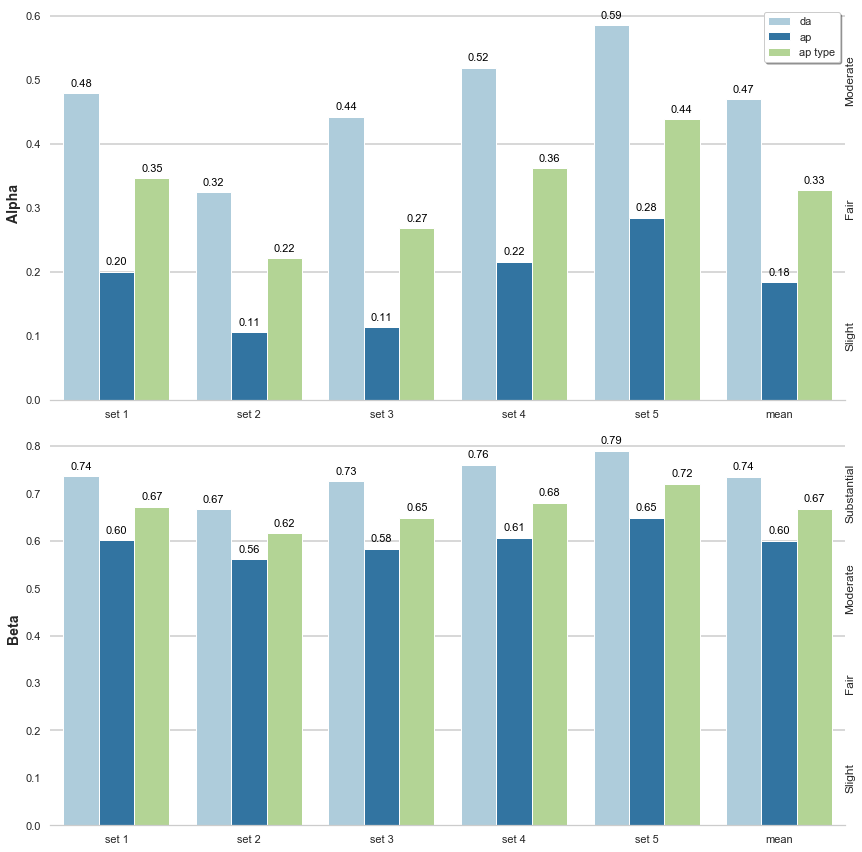

In [31]:
# Generate agreement values for each coefficient/dialogue set
set_frame, set_fig = generate_set_agreement_data(user_label_data['sets_labels'], labels, 'Dialogue Set Agreement', agreement_data_dir, save=False, show=False)
set_frame

### Label Type Stats

In [32]:
# Generate stats for each label type
label_type_frame = generate_label_type_agreement_statistics('Label Type Agreement Statistics', agreement_data_dir, save=False, show=False)
label_type_frame

Alpha                                                               \
    group1   group2 meandiff   p-value   lower   upper reject    eta_sq   
0       ap  ap type   0.1235  0.125300 -0.0263  0.2733  False       NaN   
1       ap       da   0.2462  0.001000  0.0964  0.3960   True       NaN   
2  ap type       da   0.1227  0.128800 -0.0271  0.2724  False       NaN   
3      NaN      NaN      NaN  0.000998     NaN     NaN    NaN  0.215298   

                                                               Beta           \
   omega_sq   cohen_f     n      exp_n     power exp_power   group1   group2   
0       NaN       NaN   NaN        NaN       NaN       NaN       ap  ap type   
1       NaN       NaN   NaN        NaN       NaN       NaN       ap       da   
2       NaN       NaN   NaN        NaN       NaN       NaN  ap type       da   
3  0.185215  0.260651  60.0  40.116816  0.941503       0.8      NaN      NaN   

                                                                          \
  meandiff   p-value   lower   upper reject    eta_sq  omega_sq  cohen_f   
0   0.0572  0.141400 -0.0144  0.1288  False       NaN       NaN      NaN   
1   0.1153  0.001000  0.0438  0.1869   True       NaN       NaN      NaN   
2   0.0581  0.132800 -0.0134  0.1297  False       NaN       NaN      NaN   
3      NaN  0.001262     NaN     NaN    NaN  0.208808  0.178568  0.25072   

                                       
      n      exp_n    power exp_power  
0   NaN        NaN      NaN       NaN  
1   NaN        NaN      NaN       NaN  
2   NaN        NaN      NaN       NaN  
3  60.0  41.575281  0.93258       0.8

## Task-oriented and Non-task-oriented Dialogues

group     Alpha                          Beta  \
                                         da        ap   ap type        da   
test 28             task-oriented  0.802084  0.318182  0.555914  0.896084   
test 52             task-oriented  0.370974  0.178571  0.279948  0.681300   
test 96             task-oriented  0.595147  0.222826  0.410409  0.800023   
test 129            task-oriented  0.830042  0.339806  0.581529  0.913304   
test 102            task-oriented  0.851193  0.611765  0.731258  0.919106   
task1 test 290      task-oriented  0.459638  0.057971  0.270529  0.728098   
task1 test 428      task-oriented  0.604903  0.010989  0.322478  0.794510   
task1 test 555      task-oriented  0.183561  0.012270  0.096574  0.585153   
task1 test 564      task-oriented  0.407588  0.152866  0.281143  0.688921   
task1 test 894      task-oriented  0.457207  0.350000  0.407518  0.711457   
mean                task-oriented  0.556234  0.225525  0.393730  0.771796   
jason-mammoth   non-task-oriented  0.218345  0.143294  0.183132  0.610514   
jason-clone     non-task-oriented  0.056846 -0.018429  0.021640  0.543336   
jason-accident  non-task-oriented  0.387984  0.050086  0.201280  0.709448   
lynne-hunter    non-task-oriented  0.268430 -0.007827  0.122841  0.639293   
lynne-tipsy     non-task-oriented  0.499457  0.201524  0.342842  0.743147   
KB7RE015        non-task-oriented  0.415212  0.109208  0.267018  0.693881   
KBKRE03G        non-task-oriented  0.295027  0.100962  0.200917  0.638889   
KDARE00G        non-task-oriented  0.038109  0.033784  0.035967  0.556463   
KE2RE00Y        non-task-oriented  0.276446  0.290323  0.284226  0.627327   
KBERE00G        non-task-oriented  0.139813  0.076389  0.107812  0.581598   
mean            non-task-oriented  0.259567  0.097931  0.176767  0.634390   
practice                 practice  0.840455  0.367151  0.593472  0.988400   
mean                     practice  0.840455  0.367151  0.593472  0.988400   

                                    
                      ap   ap type  
test 28         0.652893  0.770496  
test 52         0.590909  0.638156  
test 96         0.606061  0.705012  
test 129        0.703704  0.800355  
test 102        0.789474  0.854090  
task1 test 290  0.526042  0.632942  
task1 test 428  0.540146  0.666431  
task1 test 555  0.554264  0.568601  
task1 test 564  0.577778  0.632288  
task1 test 894  0.661458  0.688052  
mean            0.620273  0.695642  
jason-mammoth   0.585153  0.598442  
jason-clone     0.507772  0.526677  
jason-accident  0.565375  0.628516  
lynne-hunter    0.501718  0.566887  
lynne-tipsy     0.612845  0.672838  
KB7RE015        0.536232  0.617337  
KBKRE03G        0.531915  0.587445  
KDARE00G        0.490196  0.525276  
KE2RE00Y        0.680000  0.657820  
KBERE00G        0.541063  0.561358  
mean            0.555227  0.594260  
practice        0.952530  0.969962  
mean            0.952530  0.969962

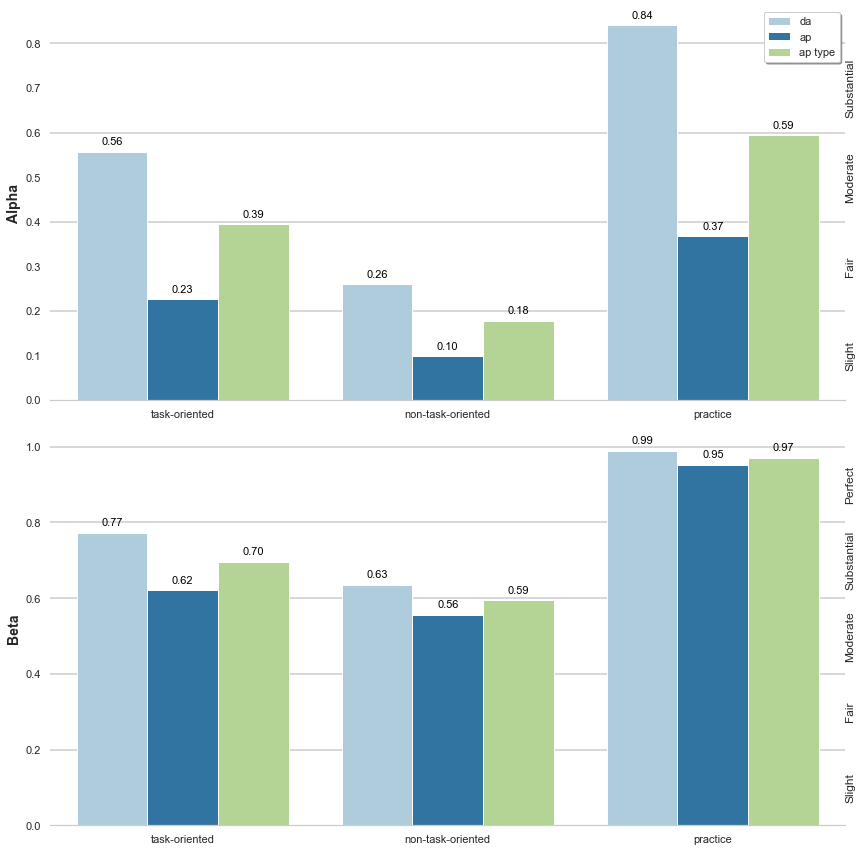

In [33]:
# Generate agreement values for each coefficient/dialogue type
type_frame, type_fig = generate_group_agreement_data(user_label_data, dialogue_type_groups + ['practice_dialogue'], labels, 'Dialogue Type Agreement', agreement_data_dir, save=False, show=False)
type_frame

### Task/non-task Stats

In [34]:
# Generate stats for each coefficient/dialogue type
type_stat_frame, basic_type_stat_frame = generate_dialogue_type_agreement_statistics('Dialogue Type Agreement Statistics', agreement_data_dir, save=False, show=False)
type_stat_frame

Alpha                                                           \
  label_type t-statistic   p-value   cohen-d   n      exp_n     power   
0         da    3.499495  0.002560  1.565022  10   7.502652  0.911098   
1         ap    1.926165  0.070026  0.861407  10  22.157948  0.445705   
2    ap type    3.213741  0.004815  1.437229  10   8.673589  0.859551   
3        all    4.320277  0.000062  1.115491  30  13.645948  0.988924   

                  Beta                                                 \
  exp_power label_type t-statistic   p-value   cohen-d   n      exp_n   
0       0.8         da    3.335372  0.003682  1.491624  10   8.137597   
1       0.8         ap    2.043209  0.055953  0.913751  10  19.808830   
2       0.8    ap type    3.150423  0.005533  1.408912  10   8.977964   
3       0.8        all    4.297046  0.000067  1.109493  30  13.781988   

                       
      power exp_power  
0  0.883550       0.8  
1  0.489622       0.8  
2  0.845809       0.8  
3  0.988241       0.8

## Corpora Agreement

group     Alpha                          Beta            \
                             da        ap   ap type        da        ap   
test 28         kvret  0.802084  0.318182  0.555914  0.896084  0.652893   
test 52         kvret  0.370974  0.178571  0.279948  0.681300  0.590909   
test 96         kvret  0.595147  0.222826  0.410409  0.800023  0.606061   
test 129        kvret  0.830042  0.339806  0.581529  0.913304  0.703704   
test 102        kvret  0.851193  0.611765  0.731258  0.919106  0.789474   
mean            kvret  0.689888  0.334230  0.511812  0.841963  0.668608   
task1 test 290   babl  0.459638  0.057971  0.270529  0.728098  0.526042   
task1 test 428   babl  0.604903  0.010989  0.322478  0.794510  0.540146   
task1 test 555   babl  0.183561  0.012270  0.096574  0.585153  0.554264   
task1 test 564   babl  0.407588  0.152866  0.281143  0.688921  0.577778   
task1 test 894   babl  0.457207  0.350000  0.407518  0.711457  0.661458   
mean             babl  0.422579  0.116819  0.275648  0.701628  0.571937   
jason-mammoth   scose  0.218345  0.143294  0.183132  0.610514  0.585153   
jason-clone     scose  0.056846 -0.018429  0.021640  0.543336  0.507772   
jason-accident  scose  0.387984  0.050086  0.201280  0.709448  0.565375   
lynne-hunter    scose  0.268430 -0.007827  0.122841  0.639293  0.501718   
lynne-tipsy     scose  0.499457  0.201524  0.342842  0.743147  0.612845   
mean            scose  0.286212  0.073730  0.174347  0.649148  0.554573   
KB7RE015        cabnc  0.415212  0.109208  0.267018  0.693881  0.536232   
KBKRE03G        cabnc  0.295027  0.100962  0.200917  0.638889  0.531915   
KDARE00G        cabnc  0.038109  0.033784  0.035967  0.556463  0.490196   
KE2RE00Y        cabnc  0.276446  0.290323  0.284226  0.627327  0.680000   
KBERE00G        cabnc  0.139813  0.076389  0.107812  0.581598  0.541063   
mean            cabnc  0.232921  0.122133  0.179188  0.619631  0.555881   

                          
                 ap type  
test 28         0.770496  
test 52         0.638156  
test 96         0.705012  
test 129        0.800355  
test 102        0.854090  
mean            0.753622  
task1 test 290  0.632942  
task1 test 428  0.666431  
task1 test 555  0.568601  
task1 test 564  0.632288  
task1 test 894  0.688052  
mean            0.637663  
jason-mammoth   0.598442  
jason-clone     0.526677  
jason-accident  0.628516  
lynne-hunter    0.566887  
lynne-tipsy     0.672838  
mean            0.598672  
KB7RE015        0.617337  
KBKRE03G        0.587445  
KDARE00G        0.525276  
KE2RE00Y        0.657820  
KBERE00G        0.561358  
mean            0.589847

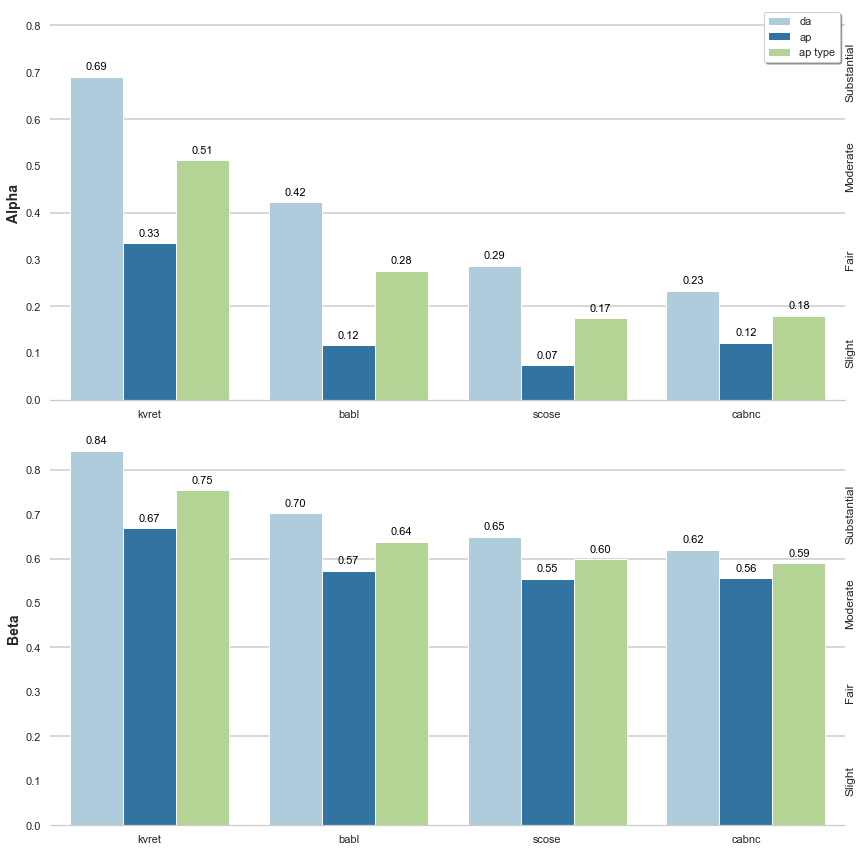

In [35]:
# Generate agreement values for each coefficient/dialogue corpora
corpora_frame, corpora_fig = generate_group_agreement_data(user_label_data, dialogue_corpora_groups, labels, 'Dialogue Corpora Agreement', agreement_data_dir, save=False, show=False)
corpora_frame

### Corpora Stats

In [36]:
# Generate stats for each coefficient/dialogue corpora
corpora_stat_frame, basic_corpora_stat_frame = generate_corpora_agreement_statistics('Dialogue Corpora Agreement Statistics', agreement_data_dir, save=False, show=False)
corpora_stat_frame

Alpha DA                                                             \
    group1 group2 meandiff   p-value   lower   upper reject    eta_sq   
0     babl  cabnc  -0.1897  0.324300 -0.4968  0.1175  False       NaN   
1     babl  kvret   0.2673  0.099900 -0.0399  0.5745  False       NaN   
2     babl  scose  -0.1364  0.586000 -0.4436  0.1708  False       NaN   
3    cabnc  kvret   0.4570  0.003000  0.1498  0.7642   True       NaN   
4    cabnc  scose   0.0533  0.900000 -0.2539  0.3605  False       NaN   
5    kvret  scose  -0.4037  0.008400 -0.7109 -0.0965   True       NaN   
6      NaN    NaN      NaN  0.002762     NaN     NaN    NaN  0.575781   

                                                           Alpha AP         \
   omega_sq   cohen_f     n      exp_n     power exp_power   group1 group2   
0       NaN       NaN   NaN        NaN       NaN       NaN     babl  cabnc   
1       NaN       NaN   NaN        NaN       NaN       NaN     babl  kvret   
2       NaN       NaN   NaN        NaN       NaN       NaN     babl  scose   
3       NaN       NaN   NaN        NaN       NaN       NaN    cabnc  kvret   
4       NaN       NaN   NaN        NaN       NaN       NaN    cabnc  scose   
5       NaN       NaN   NaN        NaN       NaN       NaN    kvret  scose   
6  0.483422  1.085817  20.0  14.601338  0.946404       0.8      NaN    NaN   

                                                                           \
  meandiff   p-value   lower   upper reject    eta_sq  omega_sq   cohen_f   
0   0.0053  0.900000 -0.2302  0.2408  False       NaN       NaN       NaN   
1   0.2174  0.075700 -0.0181  0.4529  False       NaN       NaN       NaN   
2  -0.0431  0.900000 -0.2786  0.1924  False       NaN       NaN       NaN   
3   0.2121  0.085300 -0.0234  0.4476  False       NaN       NaN       NaN   
4  -0.0484  0.900000 -0.2839  0.1871  False       NaN       NaN       NaN   
5  -0.2605  0.027600 -0.4960 -0.0250   True       NaN       NaN       NaN   
6      NaN  0.025655     NaN     NaN    NaN  0.431275  0.313496  0.606655   

                                       Alpha AP type                  \
      n      exp_n     power exp_power        group1 group2 meandiff   
0   NaN        NaN       NaN       NaN          babl  cabnc  -0.0965   
1   NaN        NaN       NaN       NaN          babl  kvret   0.2362   
2   NaN        NaN       NaN       NaN          babl  scose  -0.1013   
3   NaN        NaN       NaN       NaN         cabnc  kvret   0.3326   
4   NaN        NaN       NaN       NaN         cabnc  scose  -0.0048   
5   NaN        NaN       NaN       NaN         kvret  scose  -0.3375   
6  20.0  22.293566  0.736758       0.8           NaN    NaN      NaN   

                                                                        \
    p-value   lower   upper reject    eta_sq  omega_sq   cohen_f     n   
0  0.638600 -0.3318  0.1389  False       NaN       NaN       NaN   NaN   
1  0.049100  0.0008  0.4715   True       NaN       NaN       NaN   NaN   
2  0.606900 -0.3367  0.1341  False       NaN       NaN       NaN   NaN   
3  0.004700  0.0972  0.5680   True       NaN       NaN       NaN   NaN   
4  0.900000 -0.2402  0.2305  False       NaN       NaN       NaN   NaN   
5  0.004200 -0.5728 -0.1021   True       NaN       NaN       NaN   NaN   
6  0.002526     NaN     NaN    NaN  0.580667  0.489221  1.107794  20.0   

                                 Alpha All                                    \
       exp_n     power exp_power    group1 group2 meandiff   p-value   lower   
0        NaN       NaN       NaN      babl  cabnc  -0.0936  0.461700 -0.2619   
1        NaN       NaN       NaN      babl  kvret   0.2403  0.002100  0.0720   
2        NaN       NaN       NaN      babl  scose  -0.0936  0.461900 -0.2619   
3        NaN       NaN       NaN     cabnc  kvret   0.3339  0.001000  0.1656   
4        NaN       NaN       NaN     cabnc  scose   0.0000  0.900000 -0.1683   
5        NaN       NaN       NaN     kvret  scose  -0.3339  0.001000 -0

## AP Label Agreement (postfix-only)

Alpha                                                              \
  label_type t-statistic       p-value   cohen-d   n     exp_n     power   
0         da    3.499495  2.559594e-03  1.565022  10  7.502652  0.911098   
1         ap    3.467029  2.750845e-03  1.550503  10  7.620983  0.906074   
2    ap type    4.188328  5.523577e-04  1.873077  10  5.618257  0.977032   
3        all    5.602278  6.106380e-07  1.446502  30  8.577841  0.999806   

                  Beta                                                 \
  exp_power label_type t-statistic   p-value   cohen-d   n      exp_n   
0       0.8         da    3.335372  0.003682  1.491624  10   8.137597   
1       0.8         ap    2.933637  0.008876  1.311962  10  10.176076   
2       0.8    ap type    3.795493  0.001325  1.697396  10   6.563149   
3       0.8        all    5.144016  0.000003  1.328179  30   9.956987   

                       
      power exp_power  
0  0.883550       0.8  
1  0.792247       0.8  
2  0.948056       0.8  
3  0.999023       0.8

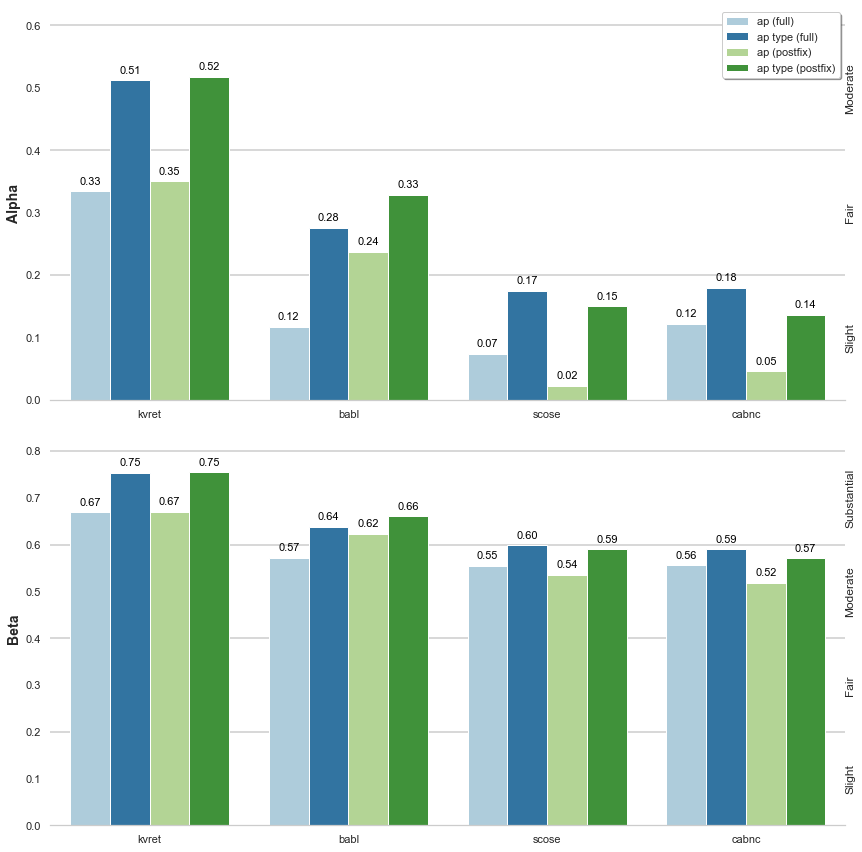

In [37]:
# Generate agreement values plot for each coefficient/dialogue corpora (post-fix)
post_fix_corpora_fig = generate_postfix_only_plot(agreement_data_dir,  save=False, show=False)

# Generate stats for each coefficient/dialogue type (post-fix)
post_fix_stat_frame, basic_post_fix_stat_frame = generate_dialogue_type_agreement_statistics('Dialogue Type Agreement Statistics', post_fix_agreement_data_dir, save=False, show=False)
post_fix_stat_frame

## Alpha vs Beta

In [38]:
# Generate user label distribution stats and plots
_, chi_frame, js_frame, bar_plt, dist_fig = generate_user_label_distributions(user_label_data['sets_labels'], sets_list, labels, 'User', distr_data_dir, save=False, show=False)


c:\python\virtual environments\venv-tf-1.15\lib\site-packages\pandas\core\generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Error in callback <function flush_figures at 0x0000026E66AC7048> (for post_execute):


KeyboardInterrupt: 

### Jensen-shannon Divergence

In [39]:
js_frame

,Group,DA JS,AP JS
0,set 1,0.271857,0.150061
1,set 2,0.304962,0.177103
2,set 3,0.183142,0.307181
3,set 4,0.232197,0.170252
4,set 5,0.260464,0.295831
mean,NaN,0.250524,0.220086
std,NaN,0.040972,0.067167


### Chi-squared

In [40]:
chi_frame

Group   User 1   User 2  DA                                         AP  \
                            dof   critical        chi   p-value reject dof   
0   set 1   usr1-1  usr11-1  20  31.410433  19.953114  0.460866  False   8   
1   set 1   usr1-1   usr6-1  18  28.869299  21.281385  0.265455  False   9   
2   set 1  usr11-1   usr6-1  20  31.410433  20.609524  0.420427  False   9   
3   set 2  usr12-2   usr2-2  18  28.869299  24.878211  0.128308  False  10   
4   set 2  usr12-2   usr7-2  19  30.143527  24.909957  0.163528  False  10   
5   set 2   usr2-2   usr7-2  19  30.143527  19.882251  0.401695  False   8   
6   set 3  usr13-3   usr3-3  19  30.143527  13.083823  0.834252  False  10   
7   set 3  usr13-3   usr8-3  18  28.869299  18.933868  0.395906  False  10   
8   set 3   usr3-3   usr8-3  17  27.587112   9.853002  0.909661  False  10   
9   set 4  usr14-4   usr4-4  19  30.143527  17.508703  0.555446  False  10   
10  set 4  usr14-4   usr9-4  17  27.587112  12.954545  0.739224  False  10   
11  set 4   usr4-4   usr9-4  15  24.995790  19.519048  0.191169  False  10   
12  set 5  usr10-5  usr15-5  18  28.869299  26.420152  0.090532  False  10   
13  set 5  usr10-5   usr5-5  18  28.869299  17.459259  0.491771  False  10   
14  set 5  usr15-5   usr5-5  19  30.143527  17.333333  0.567296  False   9   

                                           
     critical        chi   p-value reject  
0   15.507313  11.499658  0.174962  False  
1   16.918978  14.495637  0.105755  False  
2   16.918978  12.352564  0.194155  False  
3   18.307038  14.180819  0.164903  False  
4   18.307038  16.687276  0.081577  False  
5   15.507313  11.972727  0.152425  False  
6   18.307038  17.262626  0.068751  False  
7   18.307038  40.193818  0.000016   True  
8   18.307038  23.635354  0.008629   True  
9   18.307038   9.666667  0.470208  False  
10  18.307038  15.891775  0.102773  False  
11  18.307038  17.311111  0.067757  False  
12  18.307038  20.479552  0.025030   True  
13  18.307038  18.725490  0.043891   True  
14  16.918978  26.191691  0.001901   True

# Annotation Confidence Scores

kvret                      babl                     scose        \
label_type    da    ap ap type   all    da    ap ap type   all    da    ap   
min         3.00  3.00    3.00  3.00  3.00  3.00    3.00  3.00  2.00  2.00   
max         7.00  7.00    6.00  7.00  6.00  6.00    6.00  6.00  7.00  5.00   
mean        5.07  5.27    4.87  5.07  4.53  4.13    4.53  4.40  4.00  3.93   
std         1.03  1.10    0.99  1.03  0.99  0.99    0.92  0.96  1.31  1.16   

                         cabnc                      
label_type ap type   all    da    ap ap type   all  
min           2.00  2.00  3.00  3.00    3.00  3.00  
max           5.00  7.00  5.00  5.00    5.00  5.00  
mean          3.67  3.87  4.13  4.00    3.80  3.98  
std           0.98  1.14  0.64  0.85    0.68  0.72

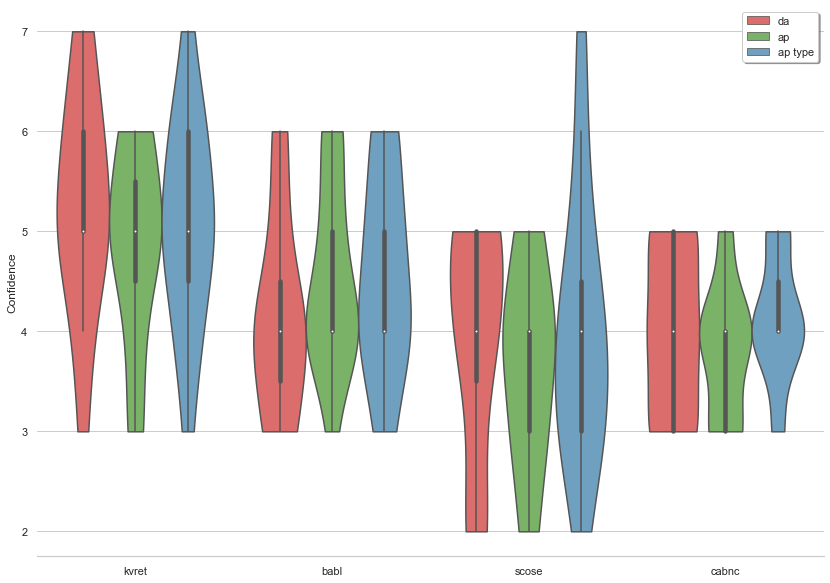

In [41]:
_, score_fig = generate_group_rating_data(user_rating_data, dialogue_corpora_groups, 'Dialogue Corpora Confidence Scores', rating_data_dir, save=False, show=False)
score_stats, basic_score_stats = generate_corpora_rating_statistics(user_rating_data, dialogue_corpora_groups, 'Dialogue Corpora Rating Statistics', rating_data_dir, save=False, show=False)
basic_score_stats.round(2)

In [42]:
score_stats

DA                                                                       \
  group1 group2 meandiff   p-value   lower   upper reject    eta_sq  omega_sq   
0   babl  cabnc  -0.4000  0.685500 -1.3874  0.5874  False       NaN       NaN   
1   babl  kvret   0.5333  0.486700 -0.4541  1.5207  False       NaN       NaN   
2   babl  scose  -0.5333  0.486700 -1.5207  0.4541  False       NaN       NaN   
3  cabnc  kvret   0.9333  0.070500 -0.0541  1.9207  False       NaN       NaN   
4  cabnc  scose  -0.1333  0.900000 -1.1207  0.8541  False       NaN       NaN   
5  kvret  scose  -1.0667  0.029400 -2.0541 -0.0793   True       NaN       NaN   
6    NaN    NaN      NaN  0.026708     NaN     NaN    NaN  0.150339  0.103255   

                                                     AP                  \
    cohen_f     n      exp_n     power exp_power group1 group2 meandiff   
0       NaN   NaN        NaN       NaN       NaN   babl  cabnc  -0.1333   
1       NaN   NaN        NaN       NaN       NaN   babl  kvret   1.1333   
2       NaN   NaN        NaN       NaN       NaN   babl  scose  -0.2000   
3       NaN   NaN        NaN       NaN       NaN  cabnc  kvret   1.2667   
4       NaN   NaN        NaN       NaN       NaN  cabnc  scose  -0.0667   
5       NaN   NaN        NaN       NaN       NaN  kvret  scose  -1.3333   
6  0.165145  60.0  70.051378  0.723891       0.8    NaN    NaN      NaN   

                                                                       \
    p-value   lower   upper reject   eta_sq  omega_sq   cohen_f     n   
0  0.900000 -1.1308  0.8642  False      NaN       NaN       NaN   NaN   
1  0.019900  0.1358  2.1308   True      NaN       NaN       NaN   NaN   
2  0.900000 -1.1975  0.7975  False      NaN       NaN       NaN   NaN   
3  0.007400  0.2692  2.2642   True      NaN       NaN       NaN   NaN   
4  0.900000 -1.0642  0.9308  False      NaN       NaN       NaN   NaN   
5  0.004400 -2.3308 -0.3358   True      NaN       NaN       NaN   NaN   
6  0.002079     NaN     NaN    NaN  0.22931  0.185471  0.277703  60.0   

                                 AP type                                    \
       exp_n     power exp_power  group1 group2 meandiff   p-value   lower   
0        NaN       NaN       NaN    babl  cabnc  -0.7333  0.126100 -1.6020   
1        NaN       NaN       NaN    babl  kvret   0.3333  0.716900 -0.5354   
2        NaN       NaN       NaN    babl  scose  -0.8667  0.050700 -1.7354   
3        NaN       NaN       NaN   cabnc  kvret   1.0667  0.010200  0.1980   
4        NaN       NaN       NaN   cabnc  scose  -0.1333  0.900000 -1.0020   
5        NaN       NaN       NaN   kvret  scose  -1.2000  0.003100 -2.0687   
6  43.373029  0.926511       0.8     NaN    NaN      NaN  0.001046     NaN   

                                                                          \
    upper reject    eta_sq  omega_sq  cohen_f     n      exp_n     power   
0  0.1354  False       NaN       NaN      NaN   NaN        NaN       NaN   
1  1.2020  False       NaN       NaN      NaN   NaN        NaN       NaN   
2  0.0020  False       NaN       NaN      NaN   NaN        NaN       NaN   
3  1.9354   True       NaN       NaN      NaN   NaN        NaN       NaN   
4  0.7354  False       NaN       NaN      NaN   NaN        NaN       NaN   
5 -0.3313   True       NaN       NaN      NaN   NaN        NaN       NaN   
6     NaN    NaN  0.248962  0.205965  0.30939  60.0  39.373841  0.951541   

               All                                                       \
  exp_power group1 group2 meandiff       p-value   lower   upper reject   
0       NaN   babl  cabnc  -0.4222  1.736000e-01 -0.9561  0.1117  False   
1       NaN   babl  kvret   0.6667  7.800000e-03  0.1328  1.2006   True   
2       NaN   babl  scose  -0.5333  5.040000e-02 -1.0672  0.0006  False   
3       NaN  cabnc  kvret   1.0889  1.000000e-03  0.5550  1.6228   True   
4       NaN  cabnc  scose  -0.1111  9.000000e-01 -0.6450  0.4228  False   
5       NaN  kvret  scose  -1

# Annotation Time

In [43]:
timing_stats, basic_timing_stats = generate_corpora_timing_statistics(user_timing_data, dialogue_corpora_groups, 'Dialogue Corpora Timing Statistics', timing_data_dir, save=False, show=False)
basic_timing_stats.round(2)

group,kvret,babl,scose,cabnc
min,10.55,10.71,9.90,11.52
max,42.28,89.06,47.32,95.76
mean,24.62,33.57,25.56,36.69
std,8.94,19.05,11.09,24.16


,min,max,mean,std
Practice,37.75,117.87,77.89,27.52
Dialogue 1,21.02,89.06,43.85,20.48
Dialogue 2,10.55,95.76,37.42,24.85
Dialogue 3,9.90,46.17,23.62,11.08
Dialogue 4,10.71,30.20,19.81,6.03


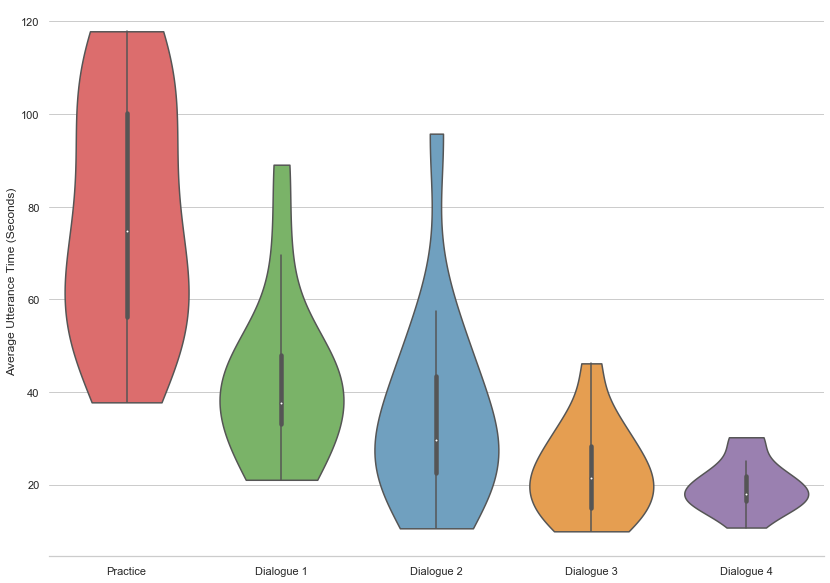

In [44]:
timing_frame, timing_fig = generate_ordered_time_data(user_timing_data['ordered_times'], 'Ordered Dialogue Times', timing_data_dir, save=False, show=False)
timing_frame = timing_frame[['min', 'max', 'mean', 'std']]
timing_frame.round(2)